## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Load Parquet

In [2]:
def load_parquet(filename):
    """Load the parquet file and return a DataFrame."""
    if not os.path.exists(filename):
        print(f"Error: File {filename} not found.")
        return None
    
    try:
        df = pd.read_parquet(filename)
        print(f"Loaded {len(df)} records")
        return df
    except Exception as e:
        print(f"Error loading parquet file: {e}")
        return None

# Load the file
filename = "decoded_ais_data.parquet"
df = load_parquet(filename)

Loaded 688878 records


## Basic Statistics Function

In [3]:
def show_basic_stats(df):
    """Display basic statistics about the dataset."""
    if df is None or len(df) == 0:
        print("No data to analyze.")
        return
    
    print("\n=== Basic Statistics ===")
    print(f"Total records: {len(df)}")
    print(f"Unique vessels (MMSIs): {df['mmsi'].nunique()}")
    
    msg_type_counts = df['msg_type'].value_counts()
    print("\nMessage type distribution:")
    for msg_type, count in msg_type_counts.items():
        print(f"  Type {msg_type}: {count} records ({count/len(df)*100:.1f}%)")
    
    position_data = df[df['lat'].notnull()]
    print(f"\nRecords with position data: {len(position_data)} ({len(position_data)/len(df)*100:.1f}%)")
    
    vessel_name_data = df[df['vessel_name'].notnull() & (df['vessel_name'] != 'N/A')]
    print(f"Records with vessel names: {len(vessel_name_data)} ({len(vessel_name_data)/len(df)*100:.1f}%)")
    
    if len(vessel_name_data) > 0:
        print("\nTop 10 vessel names:")
        for name, count in vessel_name_data['vessel_name'].value_counts().head(10).items():
            print(f"  {name}: {count}")

# Run it
show_basic_stats(df)


=== Basic Statistics ===
Total records: 688878
Unique vessels (MMSIs): 237

Message type distribution:
  Type 1: 498354 records (72.3%)
  Type 3: 89706 records (13.0%)
  Type 5: 38848 records (5.6%)
  Type 18: 26296 records (3.8%)
  Type 8: 13428 records (1.9%)
  Type 24: 12228 records (1.8%)
  Type 21: 9324 records (1.4%)
  Type 15: 380 records (0.1%)
  Type 19: 254 records (0.0%)
  Type 12: 22 records (0.0%)
  Type 10: 18 records (0.0%)
  Type 11: 6 records (0.0%)
  Type 14: 4 records (0.0%)
  Type 13: 4 records (0.0%)
  Type 7: 2 records (0.0%)
  Type 20: 2 records (0.0%)
  Type 0: 2 records (0.0%)

Records with position data: 614354 (89.2%)
Records with vessel names: 0 (0.0%)


## Filter by MMSI Function

In [8]:
def filter_by_mmsi(df, mmsi):
    """Filter data by MMSI number."""
    if df is None:
        print("No data loaded.")
        return None
    
    filtered = df[df['mmsi'] == mmsi]
    print(f"\n=== Data for MMSI {mmsi} ===")
    print(f"Records: {len(filtered)}")
    
    if len(filtered) == 0:
        print("No records found for this MMSI.")
        return filtered
        
    msg_types = filtered['msg_type'].unique()
    print(f"Message types: {sorted(msg_types)}")
    
    if 5 in msg_types:
        vessel_info = filtered[filtered['msg_type'] == 5].iloc[0]
        print(f"Vessel name: {vessel_info['vessel_name']}")
        print(f"Ship type: {vessel_info['ship_type']}")
        
    position_data = filtered[filtered['lat'].notnull()]
    if len(position_data) > 0:
        print(f"Position reports: {len(position_data)}")
        print(f"Latitude range: {position_data['lat'].min():.6f} to {position_data['lat'].max():.6f}")
        print(f"Longitude range: {position_data['lon'].min():.6f} to {position_data['lon'].max():.6f}")
        
    return filtered

# Example: Replace with an MMSI from your data
mmsi_to_filter = 538011058  # Replace with MMSI from show_basic_stats or list_vessels_with_names
filtered_df = filter_by_mmsi(df, mmsi_to_filter)


=== Data for MMSI 538011058 ===
Records: 16738
Message types: [np.int64(1), np.int64(5), np.int64(11), np.int64(15)]
Vessel name: N/A
Ship type: 79.0
Position reports: 16300
Latitude range: -24.131517 to -24.129538
Longitude range: -46.271233 to -46.270632


## Filter by Message Type Function

In [9]:
def filter_by_msg_type(df, msg_type):
    """Filter data by message type."""
    if df is None:
        print("No data loaded.")
        return None
    
    filtered = df[df['msg_type'] == msg_type]
    print(f"\n=== Data for Message Type {msg_type} ===")
    print(f"Records: {len(filtered)}")
    
    if len(filtered) == 0:
        print("No records found for this message type.")
        return filtered
    
    unique_mmsi = filtered['mmsi'].nunique()
    print(f"Unique vessels: {unique_mmsi}")
    
    if msg_type in [1, 2, 3, 18]:
        position_data = filtered[filtered['lat'].notnull()]
        if len(position_data) > 0:
            print(f"Valid position reports: {len(position_data)}")
            print(f"Latitude range: {position_data['lat'].min():.6f} to {position_data['lat'].max():.6f}")
            print(f"Longitude range: {position_data['lon'].min():.6f} to {position_data['lon'].max():.6f}")
            print(f"Speed range: {position_data['speed'].min():.1f} to {position_data['speed'].max():.1f} knots")
    
    elif msg_type == 5:
        name_data = filtered[filtered['vessel_name'].notnull() & (filtered['vessel_name'] != 'N/A')]
        if len(name_data) > 0:
            print(f"Vessels with names: {len(name_data)}")
            print("\nSample vessel names:")
            sample = name_data.drop_duplicates('mmsi').head(10)
            for _, row in sample.iterrows():
                print(f"  MMSI {row['mmsi']}: {row['vessel_name']} (Type: {row['ship_type']})")
        else:
            print("No vessels with name information in this message type.")
    
    return filtered

# Example: Try message type 1 (position report)
filtered_type_df = filter_by_msg_type(df, 1)


=== Data for Message Type 1 ===
Records: 498354
Unique vessels: 115
Valid position reports: 498354
Latitude range: -28.280393 to -23.871353
Longitude range: -48.132405 to -44.695198
Speed range: 0.0 to 102.3 knots


## Plot Vessel Track Function

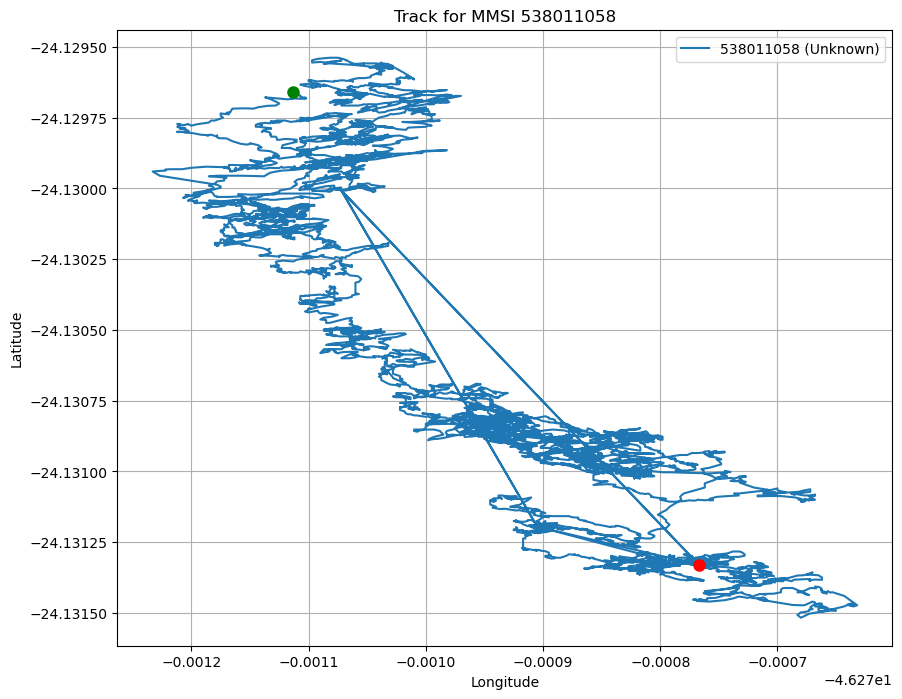

In [10]:
def plot_vessel_track(df, mmsi, save_path=None):
    """Plot vessel track on a map."""
    if df is None:
        print("No data loaded.")
        return
    
    position_data = df[(df['mmsi'] == mmsi) & df['lat'].notnull() & df['lon'].notnull()]
    
    if len(position_data) == 0:
        print(f"No position data available for MMSI {mmsi}")
        return
        
    title = f"Track for MMSI {mmsi}"
    
    plt.figure(figsize=(10, 8))
    
    vessel_name = "Unknown"
    vessel_data = df[(df['mmsi'] == mmsi) & (df['vessel_name'].notnull()) & (df['vessel_name'] != 'N/A')]
    if len(vessel_data) > 0:
        vessel_name = vessel_data.iloc[0]['vessel_name']
            
    if 'timestamp' in position_data.columns and position_data['timestamp'].nunique() > 1:
        position_data = position_data.sort_values('timestamp')
            
    plt.plot(position_data['lon'], position_data['lat'], '-', label=f"{mmsi} ({vessel_name})")
    plt.plot(position_data['lon'].iloc[0], position_data['lat'].iloc[0], 'go', markersize=8)  # Start point
    plt.plot(position_data['lon'].iloc[-1], position_data['lat'].iloc[-1], 'ro', markersize=8)  # End point
    
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
        
    x_margin = (position_data['lon'].max() - position_data['lon'].min()) * 0.05
    y_margin = (position_data['lat'].max() - position_data['lat'].min()) * 0.05
    plt.xlim([position_data['lon'].min() - x_margin, position_data['lon'].max() + x_margin])
    plt.ylim([position_data['lat'].min() - y_margin, position_data['lat'].max() + y_margin])
    
    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

# Example: Plot for the same MMSI as above
plot_vessel_track(df, mmsi_to_filter)

## List Vessels with names Function

In [11]:
def list_vessels_with_names(df):
    """List vessels that have names in the dataset."""
    if df is None:
        print("No data loaded.")
        return
    
    vessel_data = df[df['vessel_name'].notnull() & (df['vessel_name'] != 'N/A')]
    if len(vessel_data) == 0:
        print("No vessels with name information found.")
        print("\nShowing top 10 vessels by number of messages instead:")
        top_vessels = df['mmsi'].value_counts().head(10)
        for mmsi, count in top_vessels.items():
            print(f"  MMSI: {mmsi}, Messages: {count}")
        return
    
    vessels = vessel_data.groupby('mmsi')['vessel_name'].first().reset_index()
    
    print(f"\n=== Vessels with Names ({len(vessels)}) ===")
    for i, (_, row) in enumerate(vessels.iterrows(), 1):
        print(f"{i}. MMSI: {row['mmsi']}, Name: {row['vessel_name']}")
        if i >= 50:
            print(f"... and {len(vessels) - 50} more vessels")
            break

# Run it
list_vessels_with_names(df)

No vessels with name information found.

Showing top 10 vessels by number of messages instead:
  MMSI: 710032570, Messages: 27918
  MMSI: 710033530, Messages: 26126
  MMSI: 1193047, Messages: 22446
  MMSI: 710006060, Messages: 21836
  MMSI: 710011940, Messages: 21818
  MMSI: 710003538, Messages: 20560
  MMSI: 314481000, Messages: 19738
  MMSI: 710006591, Messages: 16744
  MMSI: 710007151, Messages: 16740
  MMSI: 538011058, Messages: 16738


## Interactive

In [ ]:
def interactive_explore(df):
    """Interactive exploration mode."""
    if df is None:
        print("No data loaded.")
        return
    
    while True:
        print("\n=== AIS Data Explorer ===")
        print("1. Show basic statistics")
        print("2. List vessels with names")
        print("3. Filter by MMSI")
        print("4. Filter by message type")
        print("5. Plot vessel track")
        print("6. Exit")
        
        choice = input("\nEnter choice (1-6): ")
        
        if choice == '1':
            show_basic_stats(df)
        elif choice == '2':
            list_vessels_with_names(df)
        elif choice == '3':
            try:
                mmsi = int(input("Enter MMSI number: "))
                filter_by_mmsi(df, mmsi)
            except ValueError:
                print("Invalid MMSI. Please enter a valid number.")
        elif choice == '4':
            try:
                msg_type = int(input("Enter message type (1-27): "))
                if 1 <= msg_type <= 27:
                    filter_by_msg_type(df, msg_type)
                else:
                    print("Invalid message type. Enter a number between 1 and 27.")
            except ValueError:
                print("Invalid input. Enter a valid number.")
        elif choice == '5':
            try:
                mmsi = int(input("Enter MMSI number: "))
                save_path = input("Save plot to file (leave empty to display): ")
                save_path = save_path if save_path.strip() else None
                plot_vessel_track(df, mmsi, save_path)
            except ValueError:
                print("Invalid MMSI. Enter a valid number.")
        elif choice == '6':
            print("Exiting.")
            break
        else:
            print("Invalid choice, try again.")

# Run interactive mode
interactive_explore(df)


=== AIS Data Explorer ===
1. Show basic statistics
2. List vessels with names
3. Filter by MMSI
4. Filter by message type
5. Plot vessel track
6. Exit



Enter choice (1-6):  1



=== Basic Statistics ===
Total records: 688878
Unique vessels (MMSIs): 237

Message type distribution:
  Type 1: 498354 records (72.3%)
  Type 3: 89706 records (13.0%)
  Type 5: 38848 records (5.6%)
  Type 18: 26296 records (3.8%)
  Type 8: 13428 records (1.9%)
  Type 24: 12228 records (1.8%)
  Type 21: 9324 records (1.4%)
  Type 15: 380 records (0.1%)
  Type 19: 254 records (0.0%)
  Type 12: 22 records (0.0%)
  Type 10: 18 records (0.0%)
  Type 11: 6 records (0.0%)
  Type 14: 4 records (0.0%)
  Type 13: 4 records (0.0%)
  Type 7: 2 records (0.0%)
  Type 20: 2 records (0.0%)
  Type 0: 2 records (0.0%)

Records with position data: 614354 (89.2%)
Records with vessel names: 0 (0.0%)

=== AIS Data Explorer ===
1. Show basic statistics
2. List vessels with names
3. Filter by MMSI
4. Filter by message type
5. Plot vessel track
6. Exit
